<a href="https://colab.research.google.com/github/syejin2004/2024-1-my-BDA/blob/main/inclass/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_05%EC%A1%B0_20231561_%EA%B9%80%EC%95%84%EC%98%81_20231562_%EC%84%9C%EC%98%88%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 20231561 김아영, 20231562 서예진

In [1]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2


In [2]:
!pip install koreanize_matplotlib

In [3]:
%config inlineBackend.figure_format = 'retina'

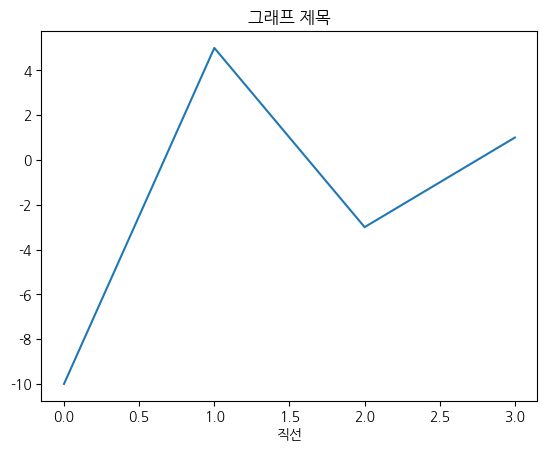

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [5]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 등급별 deck 카운트

In [7]:
import pandas as pd
import seaborn as sns

# 등급별로 deck을 카운트
deck_counts = titanic.groupby('pclass')['deck'].value_counts().unstack(fill_value=0)

# 결과 출력
display(deck_counts)


deck,A,B,C,D,E,F,G
pclass,,,,,,,
1,15,47,59,29,25,0,0
2,0,0,0,4,4,8,0
3,0,0,0,0,3,5,4


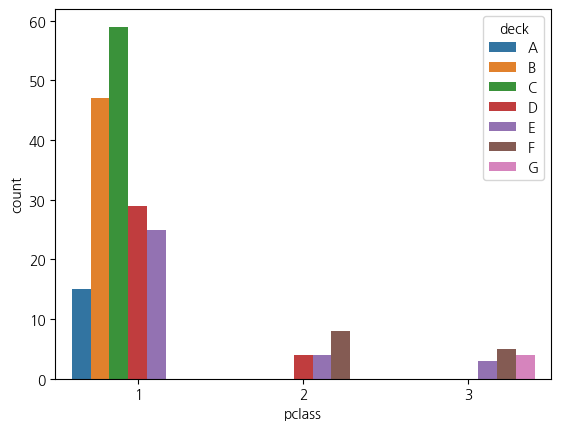

In [8]:
sns.countplot(titanic, x='pclass', hue='deck');

#### pclass에 따른 생존 & 사망한 승객의 수

In [9]:
# 필요한 열들만 선택하기
titanic_subset = titanic[['pclass', 'deck', 'alive']]

# 생존 여부를 숫자로 변환 (yes -> 1, no -> 0)
titanic_subset['alive'] = titanic_subset['alive'].map({'yes':1, 'no':0})

# 그룹화하여 생존자 수 계산
survivor_counts = titanic_subset.groupby(['pclass', 'deck']).agg(survivor_count=('alive', 'sum')).reset_index()

# 결과 출력
survivor_table = survivor_counts.pivot(index='deck', columns='pclass', values='survivor_count')

print("생존자 수:")
print(survivor_table)

생존자 수:
pclass   1  2  3
deck            
A        7  0  0
B       35  0  0
C       35  0  0
D       22  3  0
E       18  3  3
F        0  7  1
G        0  0  2


<ipython-input-9-b8d98475d852>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset['alive'] = titanic_subset['alive'].map({'yes':1, 'no':0})


In [10]:
# 필요한 열들만 선택하기
titanic_subset = titanic[['pclass', 'deck', 'alive']]

# 생존 여부를 숫자로 변환 (yes -> 1, no -> 0)
titanic_subset['alive'] = titanic_subset['alive'].map({'yes': 1, 'no': 0})

# 그룹화하여 사망자 수 계산
death_counts = titanic_subset.groupby(['pclass', 'deck']).agg(death_count=('alive', lambda x: (x == 0).sum())).reset_index()

# 결과 출력
death_table = death_counts.pivot(index='deck', columns='pclass', values='death_count').fillna(0).astype(int)

print("사망자 수:")
print(death_table)

사망자 수:
pclass   1  2  3
deck            
A        8  0  0
B       12  0  0
C       24  0  0
D        7  1  0
E        7  1  0
F        0  1  4
G        0  0  2


<ipython-input-10-49e2d98142c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset['alive'] = titanic_subset['alive'].map({'yes': 1, 'no': 0})


#### deck에 따른 pclass의 생존

<Figure size 1400x700 with 0 Axes>

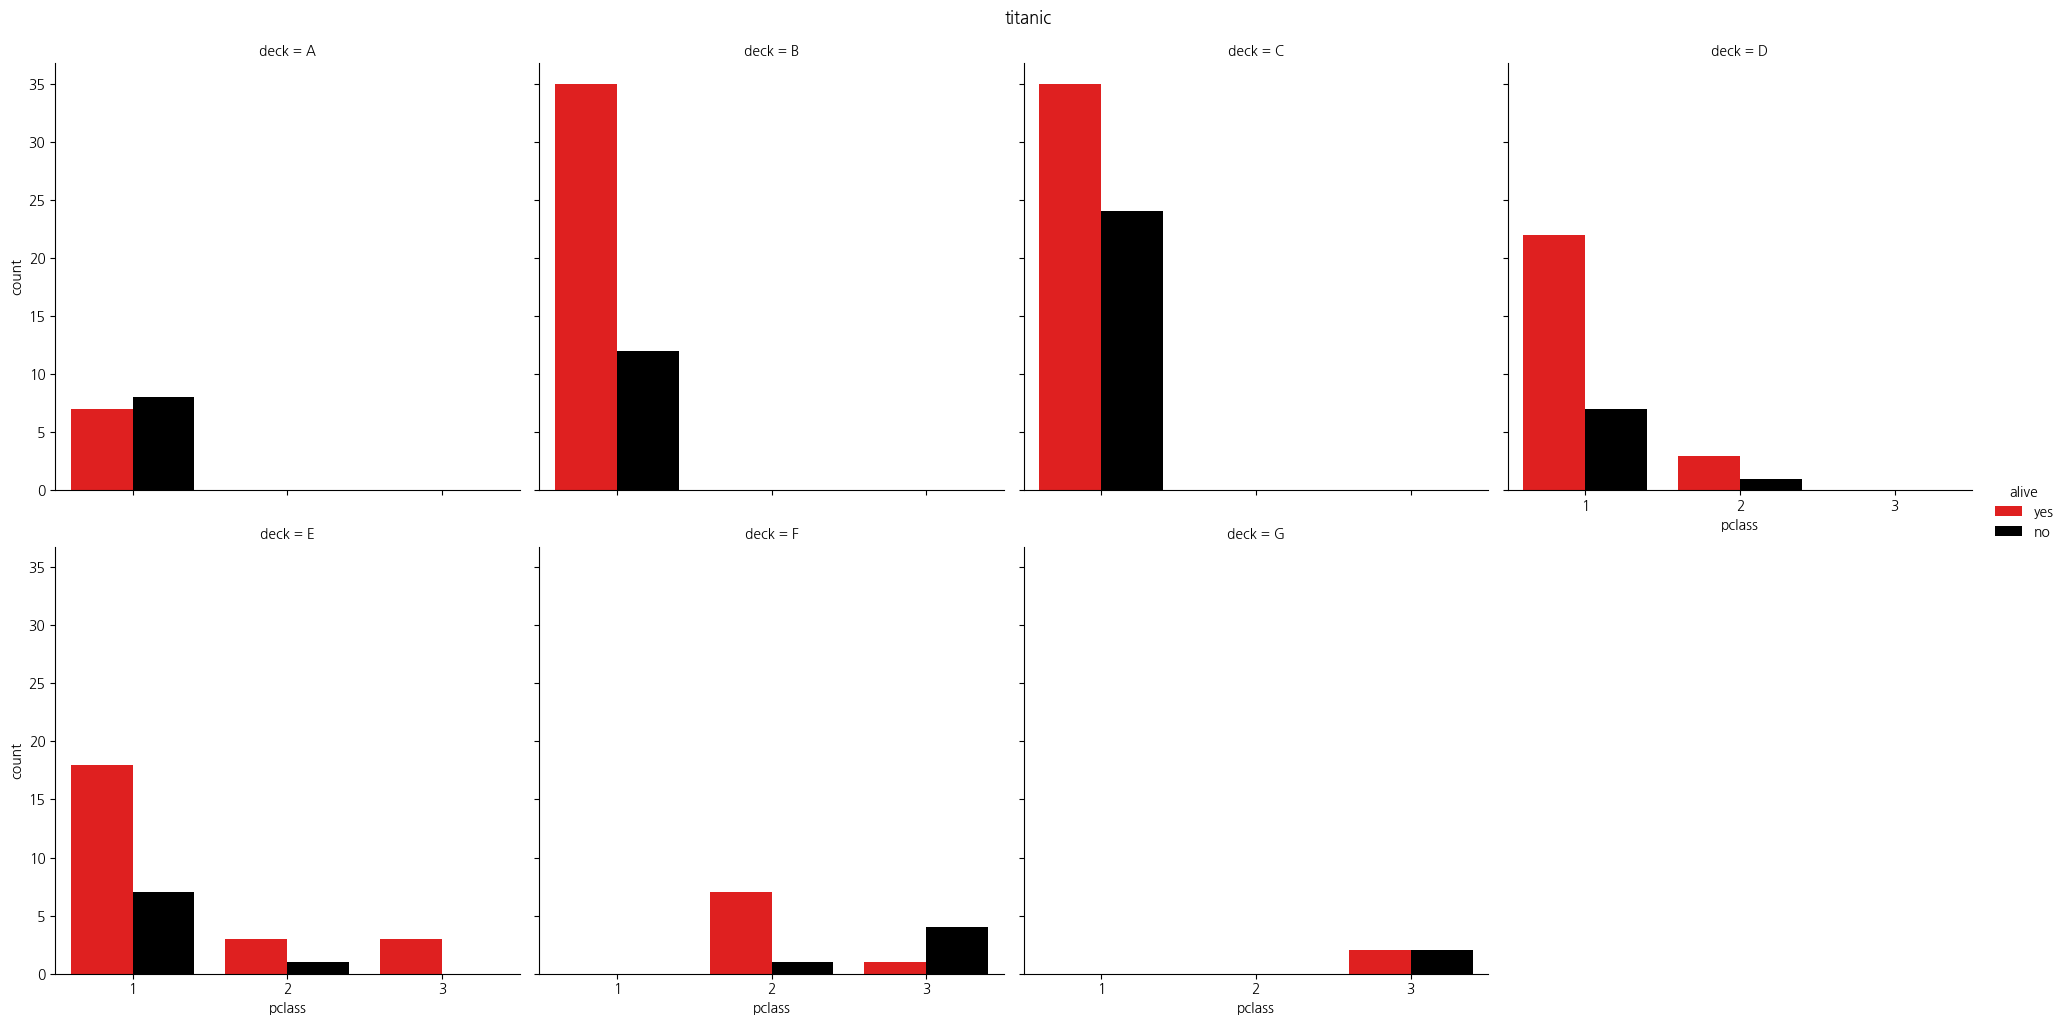

In [11]:
plt.figure(figsize=(14,7))
custom_palette = {'yes':'red', 'no':'black'}
sns.catplot(data=titanic, x='pclass', hue='alive', col='deck', kind='count', palette=custom_palette, col_wrap=4)
plt.suptitle('titanic', y=1.02)
plt.show()

#### 3등급 생존

In [12]:
import pandas as pd
import seaborn as sns

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 3등급 승객만 필터링
third_class_passengers = titanic[titanic['pclass'] == 3]

# 혼자 여행한 승객과 함께 여행한 승객 구분
alone_passengers = third_class_passengers[third_class_passengers['alone'] == True]
accompanied_passengers = third_class_passengers[third_class_passengers['alone'] == False]

# 혼자 여행한 승객과 함께 여행한 승객의 수
alone_count = len(alone_passengers)
accompanied_count = len(accompanied_passengers)

# 결과 출력
print("3등급 승객의 여행 방식 카운트:")
print(f"혼자 여행한 승객 수: {alone_count}명")
print(f"함께 여행한 승객 수: {accompanied_count}명")


3등급 승객의 여행 방식 카운트:
혼자 여행한 승객 수: 324명
함께 여행한 승객 수: 167명


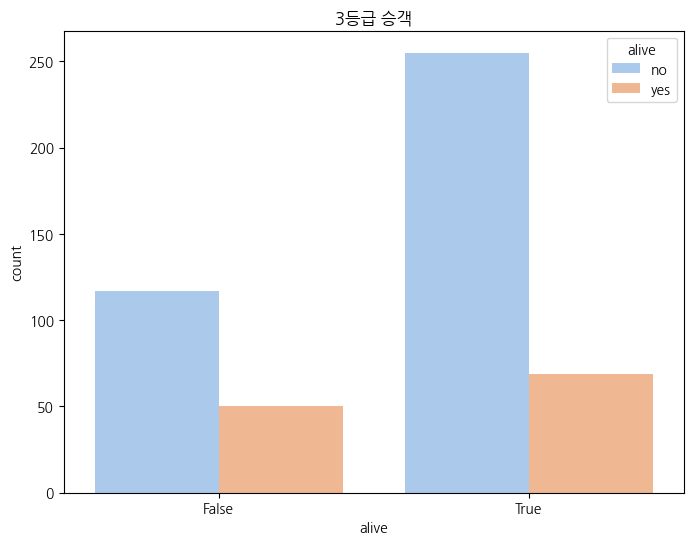

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

third_class_passengers = titanic[titanic['pclass'] == 3]

plt.figure(figsize=(8, 6))

sns.countplot(x='alone', hue='alive', data=third_class_passengers, palette='pastel')

plt.title('3등급 승객')
plt.xlabel('alive')

plt.show()


#### 범죄 공공데이터
https://www.data.go.kr/tcs/dss/selectDataSetList.do?keyword=%EB%B2%94%EC%A3%84&brm=&svcType=&instt=&recmSe=N&conditionType=init&extsn=&kwrdArray=

In [14]:
import site
import sys
import pandas as pd
import numpy as np
import seaborn as sns


#### 범죄

In [15]:
import pandas as pd

data = pd.read_csv("crime_data.csv", encoding='utf-8')  # 한글 인코딩에 맞춰서 불러오기

print(data.head())


  범죄대분류  범죄중분류      서울   부산     대구     인천     광주     대전     울산    세종  ...  \
0  강력범죄   살인기수    45.0   26    9.0   23.0   10.0    4.0    9.0   2.0  ...   
1  강력범죄  살인미수등    97.0   27   21.0   21.0    8.0   11.0    2.0   3.0  ...   
2  강력범죄     강도   139.0   86   44.0   37.0   27.0   51.0   26.0   5.0  ...   
3  강력범죄     강간  1159.0  323  246.0  362.0  197.0  175.0  108.0  25.0  ...   
4  강력범죄   유사강간   180.0   46   29.0   44.0   24.0   20.0   11.0   4.0  ...   

   경남 밀양  경남 사천  경남 양산  경남 진주  경남 창원  경남 통영  제주 서귀포  제주 제주  기타도시   도시이외  
0    0.0    1.0    2.0    4.0    4.0    0.0     3.0    5.0   0.0   32.0  
1    4.0    1.0    3.0    2.0   18.0    3.0     2.0    6.0   2.0   36.0  
2    2.0    3.0    4.0    5.0   19.0    3.0     1.0    9.0   4.0   35.0  
3   12.0    7.0   29.0   31.0   66.0    8.0    25.0   78.0  10.0  353.0  
4    1.0    0.0    2.0    5.0   19.0    0.0     4.0   14.0   1.0   54.0  

[5 rows x 89 columns]


#### 각 지역에서 가장 많이 발생한 범죄

In [16]:
import folium
import requests
import pandas as pd
from geopy.geocoders import Nominatim

# geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="crime_visualization")

# Google Maps Geocoding API를 사용하지 않고, geopy를 사용하여 주소로부터 위도와 경도를 가져오는 함수 정의
def get_lat_lng(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

crime_data = pd.read_csv("crime_data.csv", encoding='utf-8')

# 시각화할 지도 생성
m = folium.Map(location=[37.5, 127], zoom_start=7)

# 마커 클러스터 생성
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# 각 지역에서 가장 많이 발생한 범죄 찾기 및 마커 생성
for region in crime_data.columns[2:]:
    if crime_data[region].dtype in ['int64', 'float64']:  # 데이터 유형이 숫자인 경우에만 최댓값을 찾음
        max_crime_idx = crime_data[region].idxmax()  # 해당 지역에서 가장 많이 발생한 범죄 인덱스 가져오기
        max_crime_category = crime_data.loc[max_crime_idx, '범죄중분류']  # 가장 많이 발생한 범죄 중분류 가져오기
        max_crime_count = crime_data.loc[max_crime_idx, region]  # 해당 지역에서 가장 많이 발생한 범죄 건수 가져오기
        address = region  # 각 지역의 이름을 주소로 사용
        lat, lng = get_lat_lng(address)  # 주소로부터 위도와 경도 가져오기
        if lat is not None and lng is not None:
            # 범죄 발생 건수에 따라 마커의 크기와 색상을 조절하여 동그라미로 표시
            folium.CircleMarker(
                [lat, lng],
                radius=10,
                color='blue',
                fill=True,
                fill_color='blue',
                popup=f"{region}: {max_crime_category} ({max_crime_count}건)"
            ).add_to(marker_cluster)

m


In [17]:
# 필요한 라이브러리 import
import pandas as pd

# 데이터 로드
crime_data = pd.read_csv("crime_data.csv", encoding='utf-8')

# 각 지역에서 가장 많이 발생한 범죄 찾기
for region in crime_data.columns[2:]:
    if crime_data[region].dtype in ['int64', 'float64']:  # 데이터 유형이 숫자인 경우에만 최댓값을 찾음
        max_crime_idx = crime_data[region].idxmax()  # 해당 지역에서 가장 많이 발생한 범죄 인덱스 가져오기
        max_crime_category = crime_data.loc[max_crime_idx, '범죄중분류']  # 가장 많이 발생한 범죄 중분류 가져오기
        max_crime_count = crime_data.loc[max_crime_idx, region]  # 해당 지역에서 가장 많이 발생한 범죄 건수 가져오기
        print(f"{region}에서 가장 많이 발생한 범죄 중분류는 '{max_crime_category}', 건수는 {max_crime_count}입니다.")


서울에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 61132.0입니다.
대구에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 22200.0입니다.
인천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 18173.0입니다.
광주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 13779.0입니다.
대전에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 11967.0입니다.
울산에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 9956.0입니다.
세종에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1398.0입니다.
경기 고양에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 7349.0입니다.
경기 과천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 607.0입니다.
경기 광명에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 2169.0입니다.
경기 광주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 3071.0입니다.
경기 구리에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1578.0입니다.
경기 군포에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1267.0입니다.
경기 김포에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 3289.0입니다.
경기 남양주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 4339.0입니다.
경기 동두천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 764.0입니다.
경기 부천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 6974.0입니다.
경기 성남에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 7592.0입니다.
경기 수원에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 11159.0입니다.
경기 시흥에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 6327.0입니다.
경기 안산에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건

#### 무면허, 뺑소니, 음주운전 중 각 지역에서 가장 많이 일어난 범죄

In [18]:
drive = pd.read_csv('무면허.csv', encoding='euc-kr')
drive.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,중구,1,0,1,0,1,0
1,서울,용산구,3,2,4,2,2,0
2,서울,성동구,1,0,1,0,1,0
3,서울,마포구,1,0,1,0,1,0
4,서울,영등포구,1,0,1,0,1,0


In [19]:
# '시도'별로 그룹화하여 발생건수 집계
drive_counts = drive.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
drive_counts


,시도,발생건수
0,강원,5
1,경기,43
2,경남,5
3,경북,3
4,대구,8
5,대전,4
6,부산,1
7,서울,16
8,인천,3
9,전북,3


In [20]:
har = pd.read_csv('뺑소니.csv', encoding='euc-kr')
har.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,17,0,28,6,20,2
1,서울,중구,13,0,17,4,11,2
2,서울,용산구,41,1,57,15,42,0
3,서울,성동구,24,0,44,4,40,0
4,서울,동대문구,33,0,45,12,33,0


In [21]:
# '시도'별로 그룹화하여 발생건수 집계
har_counts = har.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
har_counts


,시도,발생건수
0,강원,226
1,경기,1988
2,경남,332
3,경북,386
4,광주,375
5,대구,727
6,대전,198
7,부산,457
8,서울,789
9,세종,19


In [22]:
drink = pd.read_csv('음주운전.csv', encoding='euc-kr')
drink.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,63,0,110,18,83,9
1,서울,중구,70,1,104,25,65,14
2,서울,용산구,100,0,183,46,129,8
3,서울,성동구,85,1,156,32,119,5
4,서울,동대문구,97,1,162,39,116,7


In [23]:
# '시도'별로 그룹화하여 발생건수 집계
drink_counts = drink.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
drink_counts


,시도,발생건수
0,강원,679
1,경기,5090
2,경남,958
3,경북,1190
4,광주,675
5,대구,890
6,대전,594
7,부산,743
8,서울,2856
9,세종,98


In [24]:
merge_df = pd.merge(pd.merge(drive_counts, har_counts, on='시도', how='outer'), drink_counts, on='시도', how='outer')

merge_df.rename(columns={'발생건수_x': '무면허운전', '발생건수_y': '뺑소니', '발생건수': '음주운전'}, inplace=True)

merge_df

,시도,무면허운전,뺑소니,음주운전
0,강원,5.0,226,679
1,경기,43.0,1988,5090
2,경남,5.0,332,958
3,경북,3.0,386,1190
4,대구,8.0,727,890
5,대전,4.0,198,594
6,부산,1.0,457,743
7,서울,16.0,789,2856
8,인천,3.0,579,938
9,전북,3.0,256,683


In [25]:
merge_df['최대발생건수_유형'] = merge_df[['무면허운전', '뺑소니', '음주운전']].idxmax(axis=1)
merge_df['최대발생건수'] = merge_df[['무면허운전', '뺑소니', '음주운전']].max(axis=1)

merge_df[['시도', '최대발생건수_유형', '최대발생건수']]

,시도,최대발생건수_유형,최대발생건수
0,강원,음주운전,679.0
1,경기,음주운전,5090.0
2,경남,음주운전,958.0
3,경북,음주운전,1190.0
4,대구,음주운전,890.0
5,대전,음주운전,594.0
6,부산,음주운전,743.0
7,서울,음주운전,2856.0
8,인천,음주운전,938.0
9,전북,음주운전,683.0


In [26]:
# geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="crime_visualization")

# Google Maps Geocoding API를 사용하지 않고, geopy를 사용하여 주소로부터 위도와 경도를 가져오는 함수 정의
def get_lat_lng(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# 주소를 기반으로 위도와 경도를 가져와 merge_df에 추가합니다.
merge_df['위도'], merge_df['경도'] = zip(*merge_df['시도'].apply(lambda x: get_lat_lng(x)))

# 범죄 발생 건수에 따라 동그라미의 크기와 색상을 지정하는 함수 정의
def get_marker_properties(count):
    # 크기 지정 (범죄 발생 건수가 많을수록 크기 증가)
    radius = 10 + count / 100

    # 색상 지정
    if count < 500:
        color = 'green'  # 범죄 발생 건수가 적은 경우 녹색
    elif count < 1000:
        color = 'orange'  # 범죄 발생 건수가 중간인 경우 주황색
    else:
        color = 'red'  # 범죄 발생 건수가 많은 경우 빨간색

    return radius, color

# 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 마커 추가
for _, row in merge_df.iterrows():
    # 범죄 발생 건수에 따른 동그라미의 크기와 색상 지정
    radius, color = get_marker_properties(row['최대발생건수'])

    # 동그라미 마커 추가
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['시도']}<br>{row['최대발생건수_유형']}: {row['최대발생건수']}건"
    ).add_to(m)

# 지도 표시
m


#### 경기도 음주운전

In [27]:
g_drink = pd.read_csv('경기도_음주운전.csv', encoding='euc-kr')

g_drink.set_index('구분', inplace=True)  #인덱스 설정

g_drink

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
구분,,,,,,,,,,,,
2023,658,625,719,699,609,695,717,769,713,720,650,633
2022,589,547,694,822,767,833,859,788,761,780,751,745
2021,532,583,665,664,690,653,609,607,705,733,757,687
2020,735,475,565,597,651,684,759,645,656,585,645,493
2019,612,592,621,745,734,781,670,766,712,692,825,828
2018,828,697,1102,1007,987,1047,957,951,756,825,837,740
2017,845,839,1058,1246,1294,1288,1340,1260,1193,1127,1150,1007
2016,1258,1442,1657,1690,1518,1341,1256,1160,1011,975,952,1055


In [28]:
# 각 구분별로 월별 발생건수를 더함
total = g_drink.sum(axis=1).reset_index()

# 결과 출력
total

,구분,0
0,2023,8207
1,2022,8936
2,2021,7885
3,2020,7490
4,2019,8578
5,2018,10734
6,2017,13647
7,2016,15315


In [29]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

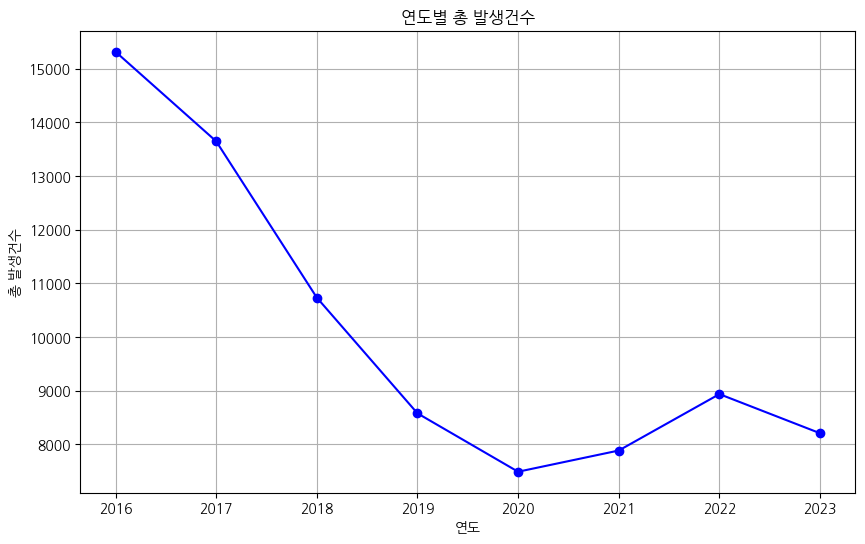

In [30]:
# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(total['구분'], total[0], marker='o', color='b')
plt.title('연도별 총 발생건수')
plt.xlabel('연도')
plt.ylabel('총 발생건수')
plt.xticks(total['구분'])  # x축 레이블을 구분으로 설정
plt.grid(True)
plt.show()
